# ONLINEADS 

#### Описание задачи
  > Международная бизнес-площадка запустила тестовую рекламу в интернете на жителей Москвы и Санкт-Петербурга. После проведения рекламной кампании были собраны данные о пользователях перешедших на сайт.

#### Цель задачи
  > Маркетологам запустистившим рекламные кампании нужно определить, какие пользователи в будущем будут регистрироваться на площадке (с высокой конверсией).

----

#### Описание признаков:


| Variable  | Definition | Key |
| --- |:---:| ---:|
| ID | Идентификатор пользователя перешедшего на сайт |  |
| Age | Возраст | 18‑24 года = 0; 25‑34 года = 1; 35‑44 года = 2; 45-54 года = 3; 55 лет и старше = 4 |
| Gender | Пол | Неизвестный = 0; Мужской = 1; Женский = 2 |
| Interest | Интересы | Бизнес = 0; Литература = 1 ; Кино = 2; Семья и дети = 3; Туризм = 4; Автомобили = 5; Кулинария = 6; Недвижимость = 7; Обустройство = 8; Мобильная связь и интернет = 9  |
| VisitTime | Время визита на сайт | От 00:00 до 23:00. Каждое число из набора данных соответствует определенному часу |
| City | Город | Москва = 0; Санкт-Петербург  = 1 |
| Device | Тип устройства | ПК = 0; Смартфон = 1 |
| OC | Операционная система | Mac OS = 0; Windows = 1; Android = 2; IOS = 3; |
| VisitPage | Страница на которую попал пользователь при клике на рекламу | Главная страница = 0; Специально разработанная для рекламной кампании страница = 1 |
| AdsTool | Источник перехода | Таргетированная реклама = 0; Контекстная реклама = 1; Прямые переходы = 2; SEO = 3; Социальные сети = 4; Остальные = 5|
| VisitNumber | Является ли переход на сайт первым визитом посетителя? | Новые посетители = 0; Вернувшиеся посетители = 1|
| ViewedPage | Количество просмотренных страниц перед регистрацией | 32-63 страниц = 0 ; 16-31 страниц = 1 ; 8-15 страниц = 2 ; 4-7 страниц = 3 ; 2-3 страниц = 4 ; 1 страница = 5 ; Остальные = 6 |
| Registration | Пользователь зарегистрировался | Да = 1; Нет = 0 |

In [151]:
import numpy as np
import pandas as pd
import pylab as pl
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import roc_auc_score, roc_curve, mean_squared_error, r2_score
#from sklearn import datasets, metrics, tree
from graphviz import Source
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import subprocess
import sklearn.metrics as metrics
from os import system
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### 1. Загрузка данных

In [20]:
data = pd.read_excel('dataset/Gover4.xlsx', sheet_name=0, index_col=0)
data.head()

,Age,Gender,Interest,VisitTime,City,Device,OS,VisitPage,AdsTool,VisitNumber,ViewedPage,Registration
ClientID,,,,,,,,,,,,
1,0,1,0,14,1,0,1,0,0,0,0,1
2,0,2,0,8,0,0,1,1,2,1,2,1
3,2,1,0,21,1,0,1,0,3,0,2,1
4,0,1,0,23,1,0,0,1,3,1,0,1
5,2,0,0,12,0,0,1,0,0,1,4,1


### 2. Выведем, описательную статистику , проверим корреляции между признаками.

In [4]:
print(data.shape)
print(data.info())

(20000, 12)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 1 to 20000
Data columns (total 12 columns):
Age             20000 non-null int64
Gender          20000 non-null int64
Interest        20000 non-null int64
VisitTime       20000 non-null int64
City            20000 non-null int64
Device          20000 non-null int64
OS              20000 non-null int64
VisitPage       20000 non-null int64
AdsTool         20000 non-null int64
VisitNumber     20000 non-null int64
ViewedPage      20000 non-null int64
Registration    20000 non-null int64
dtypes: int64(12)
memory usage: 2.0 MB
None


> В этом датасете 12 признаков, из которых 1 целевой, и 20 000 наблюдений

In [8]:
data.describe()

,Age,Gender,Interest,VisitTime,City,Device,OS,VisitPage,AdsTool,VisitNumber,ViewedPage,Registration
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,1.444550,1.308550,2.686650,12.566800,0.490250,0.490800,1.350200,0.529300,1.978850,0.547950,2.542000,0.500000
std,1.408483,0.695752,2.997684,6.110156,0.499917,0.499928,0.962084,0.499153,1.767048,0.497708,1.914764,0.500013
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,8.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,1.000000,2.000000,13.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,2.000000,0.500000
75%,3.000000,2.000000,5.000000,18.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,4.000000,1.000000
max,4.000000,2.000000,9.000000,23.000000,1.000000,1.000000,3.000000,1.000000,5.000000,1.000000,6.000000,1.000000


> Заметим, что в датасете нет пропущенных значений

Text(0.5, 1, 'Missing values heatmap')

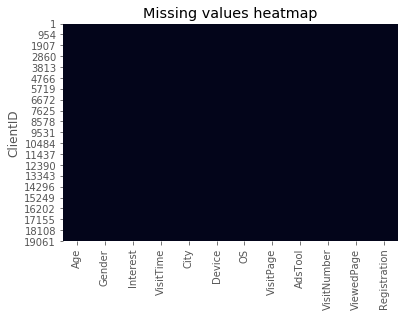

In [5]:
data.isnull().sum()
sns.heatmap(data.isnull(), cbar = False).set_title("Missing values heatmap")

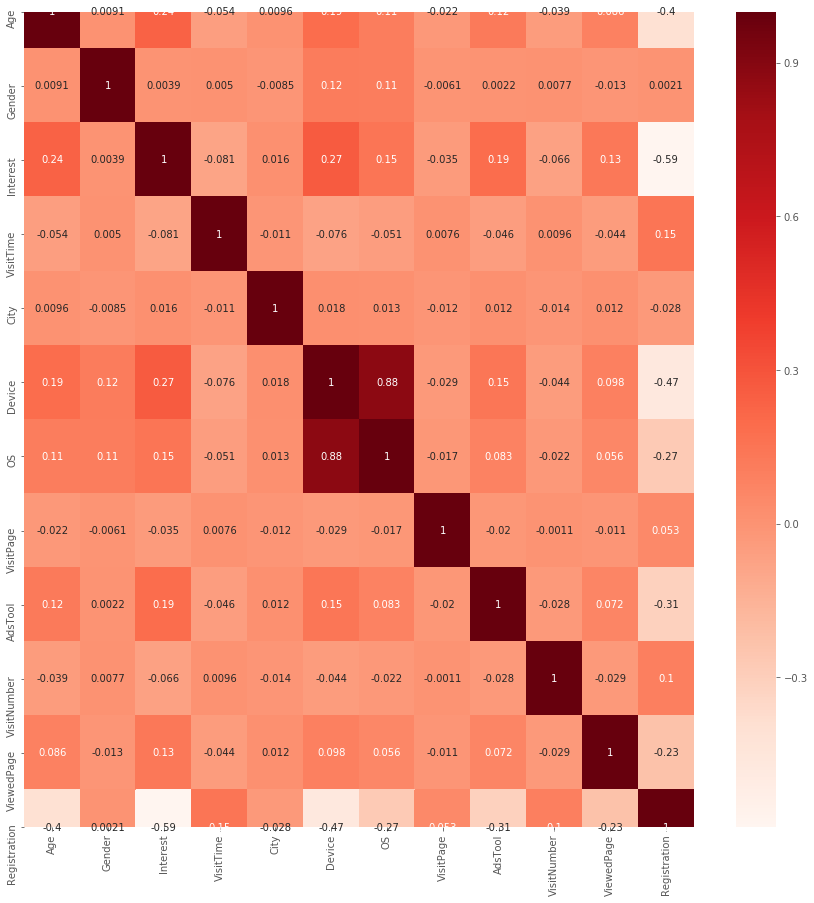

In [21]:
plt.figure(figsize=(15, 15))
correlation_matrix = data.corr()  
sns.heatmap(correlation_matrix, annot=True, cmap=plt.cm.Reds)
plt.show()

#### Удалим целевую переменную

In [24]:
X = data
y = data['Registration'].astype('int')
X.drop(['Registration'], axis=1)

,Age,Gender,Interest,VisitTime,City,Device,OS,VisitPage,AdsTool,VisitNumber,ViewedPage
ClientID,,,,,,,,,,,
1,0,1,0,14,1,0,1,0,0,0,0
2,0,2,0,8,0,0,1,1,2,1,2
3,2,1,0,21,1,0,1,0,3,0,2
4,0,1,0,23,1,0,0,1,3,1,0
5,2,0,0,12,0,0,1,0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...
19996,3,2,0,15,1,1,3,0,5,0,1
19997,0,1,0,22,0,1,3,1,2,1,5
19998,4,2,4,16,0,1,3,1,0,1,2


### 3. Разбиение на обучение и контроль

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Дерево(береза-олсу) за мат извинити

In [82]:
tree=DecisionTreeClassifier(max_depth=5, random_state=17)
tree.fit(X_train, y_train)
print('Результат на обучающей выборке: ', tree.score(X_train, y_train))
print('Результат на тестовой выборке: ', tree.score(X_test, y_test))

Результат на обучающей выборке:  0.8732857142857143
Результат на тестовой выборке:  0.8675


> **Подбор лучших параметров**

In [107]:
tree_params = {'max_depth': list(range(1,8)), 
               'min_samples_leaf': list(range(1,8)),
               'criterion': ('entropy','gini')}

tree_grid = GridSearchCV(tree, tree_params,
                         cv=5, n_jobs=-1,
                        verbose=True)
tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 98 candidates, totalling 490 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 490 out of 490 | elapsed:    5.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=17,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ('entropy', 'gini'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7],
                       

In [108]:
tree_grid.best_params_

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 7}

In [109]:
tree_grid.best_score_

0.8839285714285714

**Попробуем увеличить значения параметров и убедимся, что лучшие параметры найдены верно**

In [110]:
tree_params2 = {'max_depth': list(range(7,15)), 
               'min_samples_leaf': list(range(7,15)),
               'criterion': ('entropy','gini')}

tree_grid2 = GridSearchCV(tree, tree_params2,
                         cv=5, n_jobs=-1,
                        verbose=True)
tree_grid2.fit(X_train, y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:   13.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=17,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ('entropy', 'gini'),
                         'max_depth': [7, 8, 9, 10, 11, 12, 13, 14],
               

In [111]:
tree_grid2.best_params_

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 7}

In [113]:
tree_grid2.best_score_

0.8839285714285714

**Построим дерево по найденным параметрам**

In [114]:
tree2=DecisionTreeClassifier(max_depth=7,criterion='gini', min_samples_leaf=7)
tree2.fit(X_train, y_train)
dotfile = open(r'OnlineAds_tree.dot', 'w')

graph = Source(export_graphviz(tree2, out_file=dotfile, 
               rounded = True, proportion = False, 
                precision = 2, filled = True))
dotfile.close()
system("dot -Tpng OnlineAds_tree.dot -o OnlineAds_tree.png")

0

#### Проанализируем полученное дерево

TODO

In [120]:
# оцениваем точность
tree2.score(X_test, y_test)

0.8853333333333333

In [124]:
# оценка при кросс-валидации
val_score = max(cross_val_score(tree2, X_test, y_test, cv=5))
val_score

0.8908333333333334

In [136]:
#вычислений предсказаний по каждому из объектов в x, данный метод
#возвращает ID и значение, к какому классу, по его мнению, относится тот или иной объект
y_predict = tree2.predict_proba(X_test)[:, 1]
y_predict

array([0.98939114, 0.0214425 , 0.00352113, ..., 0.6       , 0.82872928,
       0.0214425 ])

In [137]:
# вычисление площади под ROC-кривой
#Чем больше значение AUC, тем «лучше» модель классификации. 
#Данный показатель часто используется для сравнительного анализа нескольких моделей классификации.
aue = roc_auc_score(y_test, y_predict)
aue

0.9491161622476167

In [138]:
# вычисление среднеквадратичной ошибки
rmse = np.sqrt(mean_squared_error(y_test, y_predict))
rmse

0.2915267793338298

In [139]:
# вычисление коэффициента детерминизации
r2 = r2_score(y_test, y_predict)
r2

0.6599720414343008

### Построим ROC-кривую

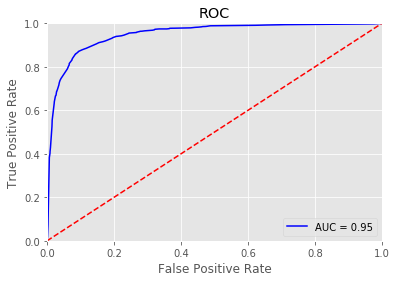

In [142]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Леса

#### Случайный лес без настройки параметров

In [144]:
first_forest = RandomForestClassifier(random_state=17)
first_forest.fit(X_train, y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=17, verbose=0,
                       warm_start=False)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


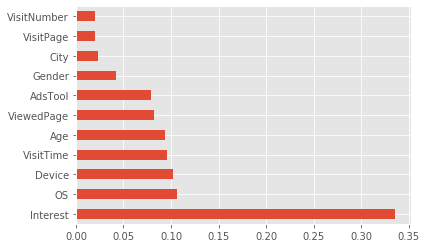

In [149]:
# используйте встроенный класс feature_importances древовидных классификаторов
# построить график важности объектов для лучшей визуализации
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()
plt.close()

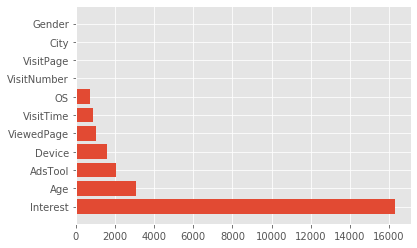

In [155]:
best_features = SelectKBest(score_func=chi2, k=10)

fit = best_features.fit(X_train, y_train)
    # берем результаты
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
    # объединяем 2 фрейма и выводим их в консоль
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']
featureScores = featureScores.nlargest(len(data.columns), 'Score')
    
    # выводим график со значением важности по каждому признаку
y_axis = []
y_stickers = []

for j in featureScores.values:
    y_axis.append(j[1])
    y_stickers.append(j[0])

ind = np.arange(len(y_axis))
plt.barh(ind, y_axis, align='center')
plt.yticks(ind, y_stickers)
    
plt.show()
plt.close()